In [2]:
import librosa
import os 
import matplotlib.pyplot as plt
import numpy as np
os.chdir("C:/Users/hp/Music")

In [16]:
y, sr = librosa.load("myRecording.wav", sr=None)
# sr=None preserves the original sample rate

# y is the audio time series (numpy array)
# sr is the sample rate of the audio file

In [17]:
y

array([-6.1035156e-05, -6.1035156e-05, -6.1035156e-05, ...,
       -2.7465820e-04, -2.1362305e-04, -1.5258789e-04], dtype=float32)

In [5]:
y.shape

(1115789,)

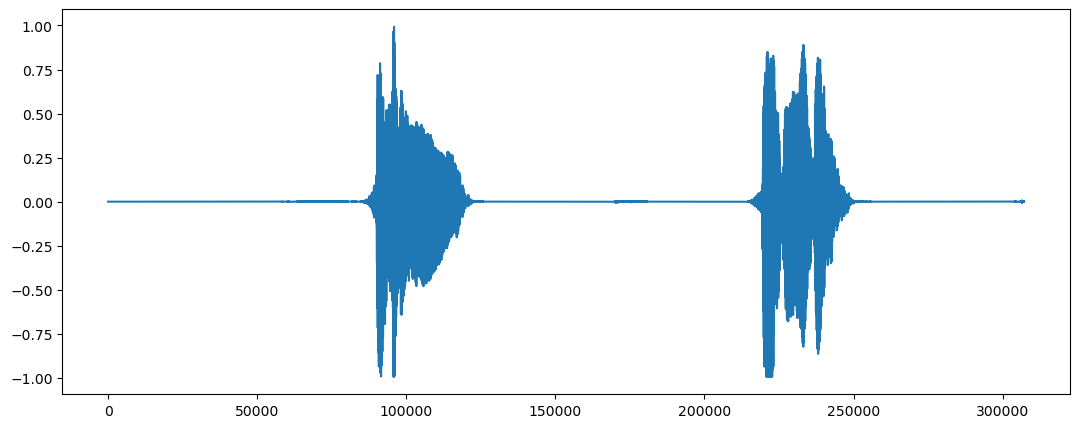

In [18]:
plt.figure(figsize=(13, 5))
plt.plot(np.arange(1, y.shape[0]+1), y)
plt.show()

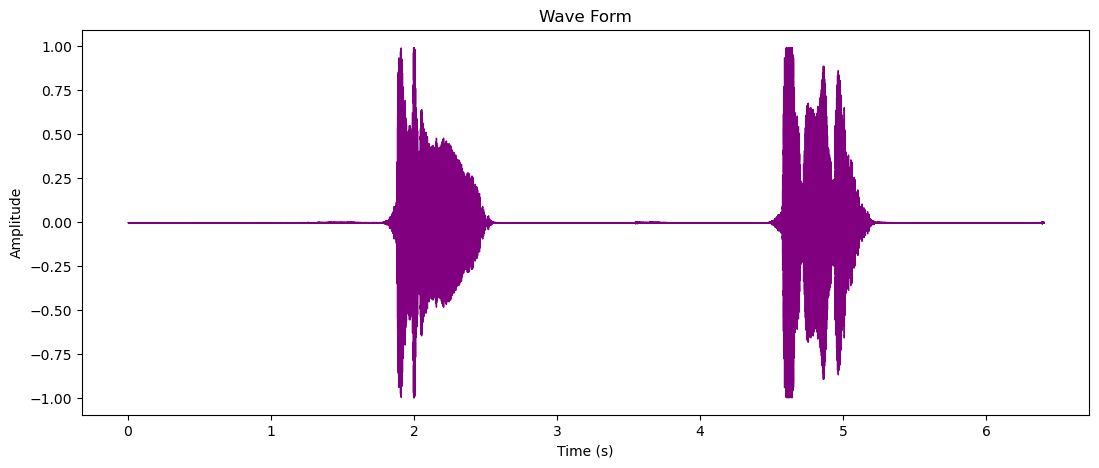

In [19]:
plt.figure(figsize=(13, 5))
librosa.display.waveshow(y, sr=sr, color='purple')
plt.title("Wave Form")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [8]:
print(f"Audio time series shape: {y.shape}")
print(f"Sample rate: {sr}")

Audio time series shape: (1115789,)
Sample rate: 44100


In [20]:
# Example processing: compute the duration of the audio
duration = librosa.get_duration(y=y, sr=sr)
print(f"Duration: {duration} seconds")

Duration: 6.4 seconds


#### STFT

The Short-Term Fourier Transform (STFT) is a method used to analyze the frequency content of a signal over short, localized time segments. It works by dividing a longer signal into smaller, equal-length segments (also called frames or windows) and then performing the Fourier Transform on each segment separately. This approach allows capturing how the frequency components of the signal evolve over time, making STFT a valuable tool for analyzing non-stationary signals like audio. The result of STFT is a time-frequency representation showing both when and which frequencies are present in the signal. This representation underlies the visualization called a spectrogram, where the intensity indicates the magnitude of frequencies at different times.

In [21]:
stft = librosa.stft(y)

In [22]:
stft.shape

(1025, 601)

Converting amplitude values to decibels

#### Spectogram

A spectrogram is a visual representation that shows how the frequency content of a sound signal varies over time. It displays time on the horizontal axis, frequency on the vertical axis, and uses color intensity or brightness to represent the amplitude (loudness) of each frequency at each moment in time. Essentially, it reveals which frequencies are present in the sound and how their intensities change, allowing detailed analysis of the sound's structure across time. This makes spectrograms useful for identifying patterns, distinguishing different sounds, or analyzing audio signals in fields such as music production, speech analysis, and audio diagnostics

In [23]:
stft.shape, stft.dtype

((1025, 601), dtype('complex64'))

X-axis: Time</br>
Y-axis: Frequency</br>
Colour: Intensity in Decibels

In [25]:
spectogram = librosa.amplitude_to_db(np.abs(stft))

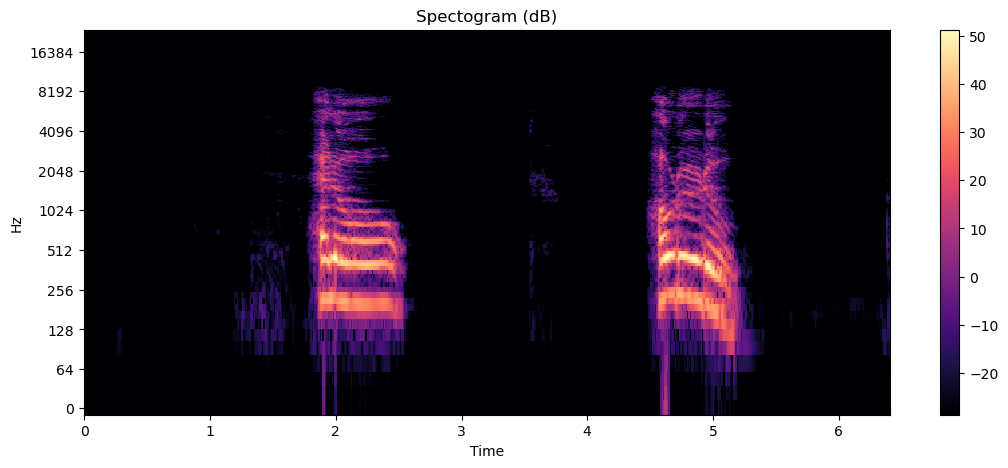

In [26]:
plt.figure(figsize=(13, 5))
librosa.display.specshow(spectogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title("Spectogram (dB)")
plt.show()

In [27]:
spectogram.shape

(1025, 601)